In [25]:
#gstat package example

rm(list = ls())
graphics.off()
library(lhs)
library(gstat)
library(sp)

#Problem definition
#Output is 1 if the product of two numbers is larger than 0.75, x1, x2 are both uniformly distributed in [0,1]
Reliability<-function (X) {
  floor(X[ ,1]*X[ ,2]/0.75)
}


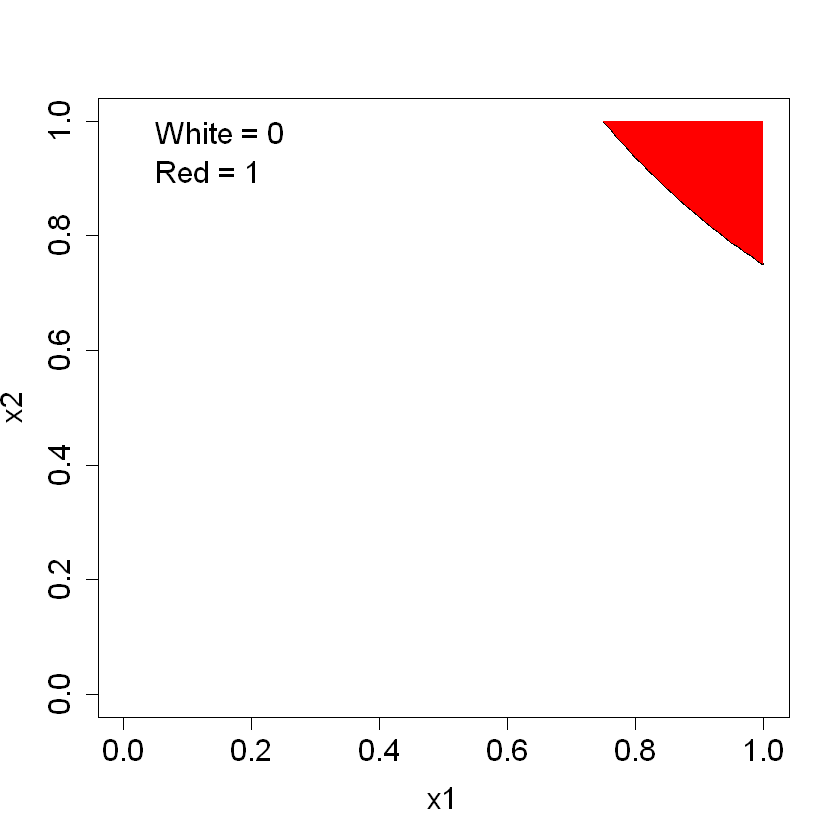

In [19]:
x <- seq(0.75,1,by=0.01)
plot(x,0.75/x,type="l",lwd=2,xlim=c(0,1),ylim=c(0,1),xlab="x1",ylab="x2",cex.lab=1.5,cex.axis=1.5)
polygon(c(0.75,1,rev(x)),c(1,1,rev(0.75/x)),col="red",border = NA)
legend("topleft",legend = c("White = 0", 'Red = 1'),cex = 1.5,bty = "n")

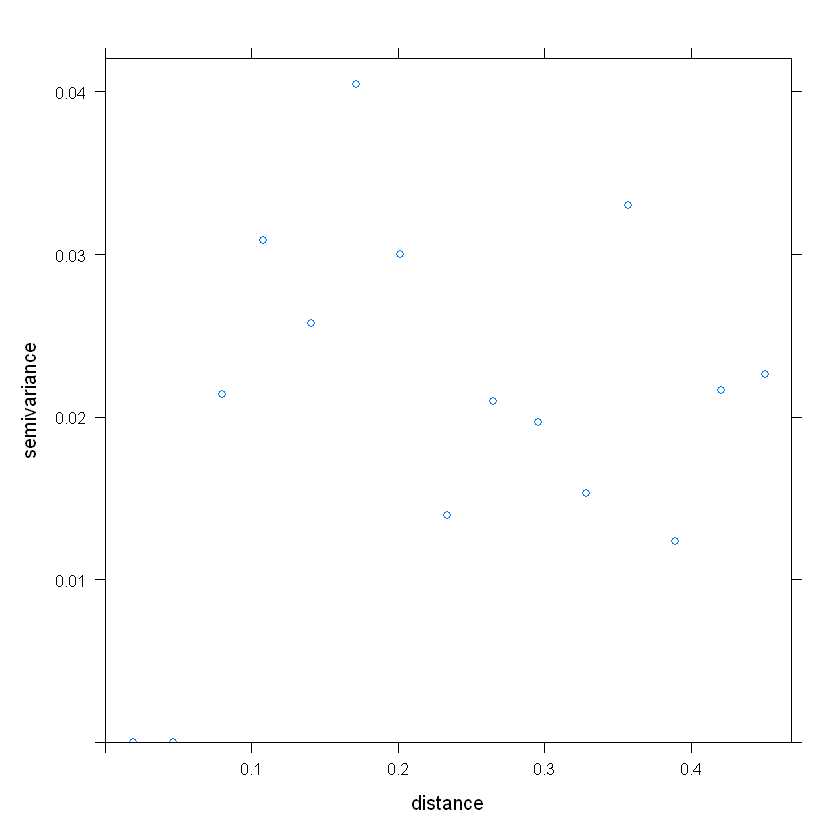

In [20]:
N=5000
n=100
X_all <- data.frame(randomLHS(N,2))
x <- X_all[c(1:n), ]
X <- X_all[c((n+1):N), ]
y <- Reliability(x)
Data <- data.frame(X1=x$X1,X2=x$X2,y=y)
coordinates(Data)=~X1+X2
TheVariogram=variogram(y~1, data=Data)
plot(TheVariogram)

Warning message in fit.variogram(TheVariogram, model = TheVariogramModel):
"No convergence after 200 iterations: try different initial values?"


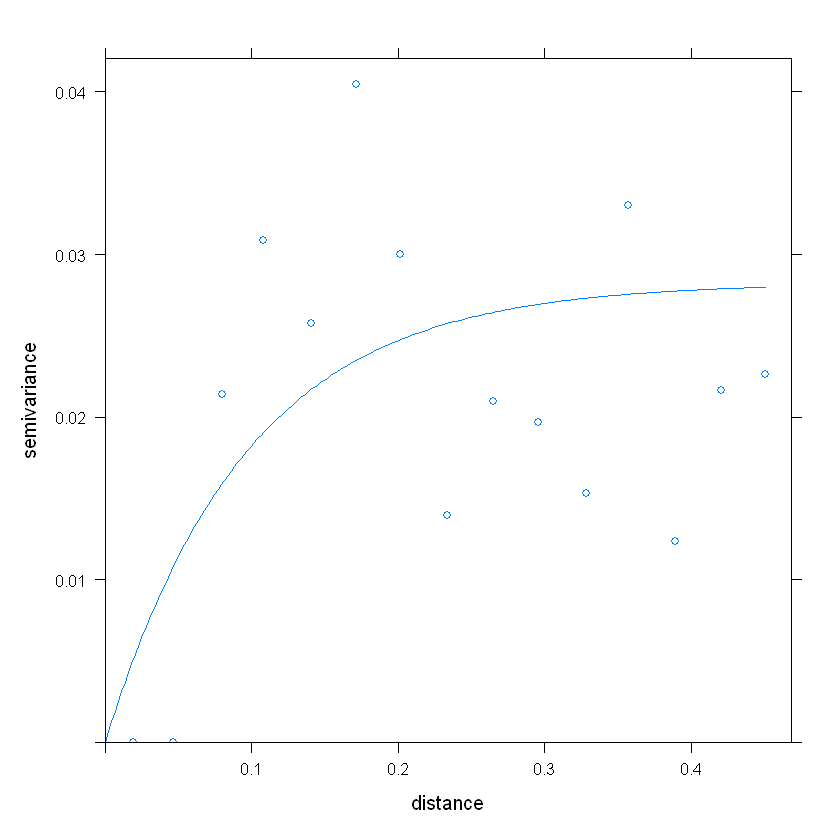

In [21]:
TheVariogramModel <- vgm(psill=0.01, model="Exp", nugget=0.001, range=0.2)
FittedModel <- fit.variogram(TheVariogram, model=TheVariogramModel)
plot(TheVariogram,model=FittedModel)

In [22]:
TheGStat <- gstat(id="Rel", formula=y ~ 1, data=Data,model=FittedModel )
level <- seq(0, 1, length=50)
Grid <- expand.grid(X1=level,X2=level)
coordinates(Grid) <- ~ X1+X2
gridded(Grid) <- TRUE
KrigSurface <- predict(TheGStat, model=FittedModel, newdata=Grid)

[using ordinary kriging]


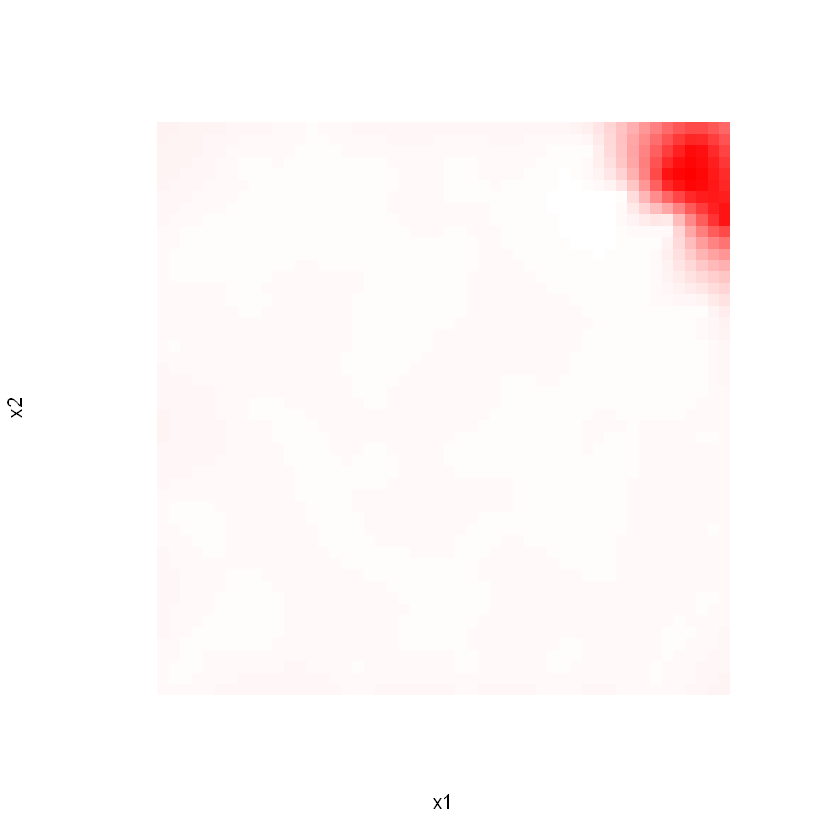

In [24]:
colfunc <- colorRampPalette(c("white", "red"))
cols <- colfunc(100)
image(KrigSurface, col=cols，xlab="x1", ylab="x2")